<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_machine_learning_LinearRegressor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint機械学習スクラッチ　線形回帰

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """

    # 【問題１】仮定関数
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        
        self.Yhat = np.dot(X, theta)
        return self.Yhat

    # 【問題2】最急降下法
    def _gradient_descent(self, X, y, Yhat, theta):
        """
        説明を記述
        """
        error = Yhat - y
        Xerror = X * error
        
        #self.theta /= self.Xerror.shape[0]
        tmp = np.sum(Xerror, axis=0) / Xerror.shape[0]
        tmp *= self.lr
        tmp = tmp.reshape(-1,1)
        theta -= tmp
        
        return theta

    # 【問題5】目的関数
    def _log_loss(self, y, yhat):
        
        return np.sum((yhat - y)**2) / (yhat.shape[0] * 2)

    # 【問題5】目的関数
    def _log_val_loss(self, y_val, yhat_val):

        return np.sum((yhat_val - y_val)**2) / (yhat_val.shape[0] * 2)

    # 【問題7】学習曲線のプロット
    def _log_los_scatter(self, loss, val_loss):
        
        plt.title("Curve of study")
        plt.xlabel("iteration")
        plt.ylabel("Objective Function")
        plt.plot(loss, label="train")
        plt.plot(val_loss, label="val")
        plt.legend()
        plt.show()
        
    def __init__(self, num_iter=10000, lr=0.001, no_bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # 【問題6】学習と推定
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #学習データの計算
        self.theta = np.random.rand(X.shape[1]).reshape(-1,1)
        #self.theta=[[0.02686675, 0.08460201, 0.45090755, 0.42461942, 0.08514528]]

        if not self.no_bias:
            self.theta = np.insert(self.theta, 0, np.random.rand(1)).reshape(-1,1)
            #self.theta = np.insert(self.theta, 0, 0.33778422).reshape(-1,1)
            X = np.insert(X, 0, 1, axis=1)

        for i in range(self.iter) :
            #問題１：仮定関数（シグモイド関数）で学習用データを計算し、Yhatを算出する。
            Yhat = self._linear_hypothesis(X, self.theta)
            Yhat = Yhat.reshape(-1,1)
            
            # 再急降下法の計算を行い、thetaを更新する。
            self.theta = self._gradient_descent(X, y, Yhat, self.theta)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                self.loss[i] = self._log_loss(y, Yhat)
                print("{}回目：,log.loss={}".format(i+1, self.loss[i]))
                
        self.coef_ = self.theta.reshape(-1, 1)
        
        #検証用データの計算
        if X_val is not None:
            self.theta_val = np.random.rand(X.shape[1]).reshape(-1,1)
            #self.theta_val = [[0.02686675, 0.08460201, 0.45090755, 0.42461942, 0.08514528]]

            if not self.no_bias:
                self.theta_val = np.insert(self.theta, 0, np.random.rand(1)).reshape(-1,1)
                #self.theta_val = np.insert(self.theta_val, 0, 0.33778422).reshape(-1,1)
                X_val = np.insert(X_val, 0, 1, axis=1)

            for i in range(self.iter) :
                #問題１：仮定関数（シグモイド関数）で学習用データを計算し、Yhatを算出する。
                Yhat_val = self._linear_hypothesis(X_val, self.theta_val)
                Yhat_val = Yhat_val.reshape(-1,1)
            
                # 再急降下法の計算を行い、thetaを更新する。
                self.theta_val = self._gradient_descent(X_val, y_val, Yhat_val, self.theta_val)
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    self.val_loss[i] = self._log_val_loss(y_val, Yhat_val)
                    print("{}回目：,log_val.loss={}".format(i+1, self.val_loss[i]))

        self._log_los_scatter(self.loss, self.val_loss)

    # 【問題3】推定
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
        pred = self._linear_hypothesis(X, self.coef_)
        return pred

### 住宅情報データの読み込み

In [ ]:
DATA_DIR='C:/Users/es/Documents/Python Scripts/Feb/Week1/AfterClass/'
data = pd.read_csv(f'{DATA_DIR}train.csv')
X = data.loc[:,['LotArea','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt']]
y = data.loc[:,['SalePrice']]
X.isnull().sum()
y.isnull().sum()

SalePrice    0
dtype: int64

In [ ]:
pd.set_option('max_rows',2000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
#X_train.to_csv(f'{DATA_DIR}X_train.csv')

In [ ]:
#y_train.to_csv(f'{DATA_DIR}y_train.csv')

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
lr = ScratchLinearRegression(num_iter=10000, lr=0.0000000001, no_bias=True) # 【問題8】（アドバンス課題）バイアス項の除去

1回目：,log.loss=18435850425.683
2回目：,log.loss=18017181272.908447
3回目：,log.loss=17614558672.14221
4回目：,log.loss=17227362405.16534
5回目：,log.loss=16854996229.117794
6回目：,log.loss=16496886949.69714
7回目：,log.loss=16152483530.184074
8回目：,log.loss=15821256234.909838
9回目：,log.loss=15502695805.834063
10回目：,log.loss=15196312670.953218
11回目：,log.loss=14901636183.309095
12回目：,log.loss=14618213889.41453
13回目：,log.loss=14345610825.959135
14回目：,log.loss=14083408843.701883
15回目：,log.loss=13831205957.499563
16回目：,log.loss=13588615721.460806
17回目：,log.loss=13355266628.254421
18回目：,log.loss=13130801531.63831
19回目：,log.loss=12914877091.311327
20回目：,log.loss=12707163239.225204
21回目：,log.loss=12507342666.526922
22回目：,log.loss=12315110330.334036
23回目：,log.loss=12130172979.576323
24回目：,log.loss=11952248699.166672
25回目：,log.loss=11781066471.792706
26回目：,log.loss=11616365756.647938
27回目：,log.loss=11457896084.447708
28回目：,log.loss=11305416668.100317
29回目：,log.loss=11158696028.428244
30回目：,log.loss=11017511634.3576

616回目：,log.loss=5842048317.95936
617回目：,log.loss=5839559818.170996
618回目：,log.loss=5837072832.184352
619回目：,log.loss=5834587359.074088
620回目：,log.loss=5832103397.915433
621回目：,log.loss=5829620947.784183
622回目：,log.loss=5827140007.756698
623回目：,log.loss=5824660576.909903
624回目：,log.loss=5822182654.321288
625回目：,log.loss=5819706239.0689125
626回目：,log.loss=5817231330.231393
627回目：,log.loss=5814757926.887913
628回目：,log.loss=5812286028.11822
629回目：,log.loss=5809815633.002627
630回目：,log.loss=5807346740.622004
631回目：,log.loss=5804879350.057788
632回目：,log.loss=5802413460.391974
633回目：,log.loss=5799949070.707127
634回目：,log.loss=5797486180.086362
635回目：,log.loss=5795024787.613364
636回目：,log.loss=5792564892.372375
637回目：,log.loss=5790106493.448195
638回目：,log.loss=5787649589.926189
639回目：,log.loss=5785194180.8922825
640回目：,log.loss=5782740265.43295
641回目：,log.loss=5780287842.635235
642回目：,log.loss=5777836911.586736
643回目：,log.loss=5775387471.375609
644回目：,log.loss=5772939521.090571
645回目：,log.loss

1190回目：,log.loss=4635947487.881312
1191回目：,log.loss=4634192033.798013
1192回目：,log.loss=4632437645.46159
1193回目：,log.loss=4630684322.220678
1194回目：,log.loss=4628932063.424312
1195回目：,log.loss=4627180868.421922
1196回目：,log.loss=4625430736.563334
1197回目：,log.loss=4623681667.198781
1198回目：,log.loss=4621933659.678882
1199回目：,log.loss=4620186713.354656
1200回目：,log.loss=4618440827.577524
1201回目：,log.loss=4616696001.699299
1202回目：,log.loss=4614952235.07219
1203回目：,log.loss=4613209527.048807
1204回目：,log.loss=4611467876.982149
1205回目：,log.loss=4609727284.2256155
1206回目：,log.loss=4607987748.132998
1207回目：,log.loss=4606249268.058487
1208回目：,log.loss=4604511843.356663
1209回目：,log.loss=4602775473.382505
1210回目：,log.loss=4601040157.491388
1211回目：,log.loss=4599305895.039075
1212回目：,log.loss=4597572685.381728
1213回目：,log.loss=4595840527.875899
1214回目：,log.loss=4594109421.878537
1215回目：,log.loss=4592379366.746982
1216回目：,log.loss=4590650361.838968
1217回目：,log.loss=4588922406.51262
1218回目：,log.loss=45871

1801回目：,log.loss=3739461168.87858
1802回目：,log.loss=3738249264.868397
1803回目：,log.loss=3737038094.423353
1804回目：,log.loss=3735827657.0951843
1805回目：,log.loss=3734617952.4359074
1806回目：,log.loss=3733408979.997806
1807回目：,log.loss=3732200739.3334417
1808回目：,log.loss=3730993229.99565
1809回目：,log.loss=3729786451.5375376
1810回目：,log.loss=3728580403.512484
1811回目：,log.loss=3727375085.4741445
1812回目：,log.loss=3726170496.9764457
1813回目：,log.loss=3724966637.573586
1814回目：,log.loss=3723763506.8200407
1815回目：,log.loss=3722561104.270551
1816回目：,log.loss=3721359429.4801345
1817回目：,log.loss=3720158482.00408
1818回目：,log.loss=3718958261.3979483
1819回目：,log.loss=3717758767.2175736
1820回目：,log.loss=3716559999.0190578
1821回目：,log.loss=3715361956.358776
1822回目：,log.loss=3714164638.7933774
1823回目：,log.loss=3712968045.8797765
1824回目：,log.loss=3711772177.175165
1825回目：,log.loss=3710577032.2369995
1826回目：,log.loss=3709382610.623013
1827回目：,log.loss=3708188911.891204
1828回目：,log.loss=3706995935.599843
1829回目：,l

2364回目：,log.loss=3161011840.5520296
2365回目：,log.loss=3160149476.5041
2366回目：,log.loss=3159287632.4491525
2367回目：,log.loss=3158426308.069506
2368回目：,log.loss=3157565503.0476766
2369回目：,log.loss=3156705217.066372
2370回目：,log.loss=3155845449.808495
2371回目：,log.loss=3154986200.957144
2372回目：,log.loss=3154127470.1956058
2373回目：,log.loss=3153269257.2073674
2374回目：,log.loss=3152411561.676105
2375回目：,log.loss=3151554383.2856894
2376回目：,log.loss=3150697721.7201843
2377回目：,log.loss=3149841576.663849
2378回目：,log.loss=3148985947.801132
2379回目：,log.loss=3148130834.8166776
2380回目：,log.loss=3147276237.3953214
2381回目：,log.loss=3146422155.2220926
2382回目：,log.loss=3145568587.982212
2383回目：,log.loss=3144715535.3610935
2384回目：,log.loss=3143862997.0443444
2385回目：,log.loss=3143010972.717762
2386回目：,log.loss=3142159462.0673375
2387回目：,log.loss=3141308464.779252
2388回目：,log.loss=3140457980.539882
2389回目：,log.loss=3139608009.035793
2390回目：,log.loss=3138758549.953742
2391回目：,log.loss=3137909602.9806786
2392回目：,

2943回目：,log.loss=2739330395.5075
2944回目：,log.loss=2738721686.952292
2945回目：,log.loss=2738113343.446729
2946回目：,log.loss=2737505364.767864
2947回目：,log.loss=2736897750.6928883
2948回目：,log.loss=2736290500.999126
2949回目：,log.loss=2735683615.4640403
2950回目：,log.loss=2735077093.865229
2951回目：,log.loss=2734470935.980426
2952回目：,log.loss=2733865141.587502
2953回目：,log.loss=2733259710.464462
2954回目：,log.loss=2732654642.3894477
2955回目：,log.loss=2732049937.1407375
2956回目：,log.loss=2731445594.4967422
2957回目：,log.loss=2730841614.2360125
2958回目：,log.loss=2730237996.13723
2959回目：,log.loss=2729634739.9792137
2960回目：,log.loss=2729031845.54092
2961回目：,log.loss=2728429312.6014357
2962回目：,log.loss=2727827140.939986
2963回目：,log.loss=2727225330.3359323
2964回目：,log.loss=2726623880.568765
2965回目：,log.loss=2726022791.4181166
2966回目：,log.loss=2725422062.663749
2967回目：,log.loss=2724821694.0855613
2968回目：,log.loss=2724221685.4635873
2969回目：,log.loss=2723622036.577993
2970回目：,log.loss=2723022747.2090816
2971回目：,log

3518回目：,log.loss=2443111929.765905
3519回目：,log.loss=2442680278.5421634
3520回目：,log.loss=2442248884.2556953
3521回目：,log.loss=2441817746.7496533
3522回目：,log.loss=2441386865.8672853
3523回目：,log.loss=2440956241.4519353
3524回目：,log.loss=2440525873.3470426
3525回目：,log.loss=2440095761.3961434
3526回目：,log.loss=2439665905.4428678
3527回目：,log.loss=2439236305.330942
3528回目：,log.loss=2438806960.90419
3529回目：,log.loss=2438377872.0065274
3530回目：,log.loss=2437949038.481969
3531回目：,log.loss=2437520460.1746216
3532回目：,log.loss=2437092136.9286895
3533回目：,log.loss=2436664068.588472
3534回目：,log.loss=2436236254.998364
3535回目：,log.loss=2435808696.002854
3536回目：,log.loss=2435381391.4465256
3537回目：,log.loss=2434954341.174059
3538回目：,log.loss=2434527545.0302286
3539回目：,log.loss=2434101002.859904
3540回目：,log.loss=2433674714.5080485
3541回目：,log.loss=2433248679.8197217
3542回目：,log.loss=2432822898.6400776
3543回目：,log.loss=2432397370.814363
3544回目：,log.loss=2431972096.187921
3545回目：,log.loss=2431547074.6061907
3546

4205回目：,log.loss=2199486761.972761
4206回目：,log.loss=2199199329.023796
4207回目：,log.loss=2198912065.003398
4208回目：,log.loss=2198624969.808525
4209回目：,log.loss=2198338043.336197
4210回目：,log.loss=2198051285.4834976
4211回目：,log.loss=2197764696.1475735
4212回目：,log.loss=2197478275.225633
4213回目：,log.loss=2197192022.6149487
4214回目：,log.loss=2196905938.212857
4215回目：,log.loss=2196620021.9167533
4216回目：,log.loss=2196334273.624099
4217回目：,log.loss=2196048693.2324166
4218回目：,log.loss=2195763280.6392922
4219回目：,log.loss=2195478035.742375
4220回目：,log.loss=2195192958.4393744
4221回目：,log.loss=2194908048.628065
4222回目：,log.loss=2194623306.206283
4223回目：,log.loss=2194338731.0719256
4224回目：,log.loss=2194054323.122954
4225回目：,log.loss=2193770082.2573924
4226回目：,log.loss=2193486008.3733253
4227回目：,log.loss=2193202101.3689003
4228回目：,log.loss=2192918361.1423283
4229回目：,log.loss=2192634787.5918818
4230回目：,log.loss=2192351380.6158943
4231回目：,log.loss=2192068140.112763
4232回目：,log.loss=2191785065.9809465
4233回

4794回目：,log.loss=2056241661.4677432
4795回目：,log.loss=2056037840.1349804
4796回目：,log.loss=2055834136.7512286
4797回目：,log.loss=2055630551.2446089
4798回目：,log.loss=2055427083.543288
4799回目：,log.loss=2055223733.5754771
4800回目：,log.loss=2055020501.2694304
4801回目：,log.loss=2054817386.553446
4802回目：,log.loss=2054614389.3558674
4803回目：,log.loss=2054411509.605079
4804回目：,log.loss=2054208747.2295113
4805回目：,log.loss=2054006102.157638
4806回目：,log.loss=2053803574.3179762
4807回目：,log.loss=2053601163.639087
4808回目：,log.loss=2053398870.049575
4809回目：,log.loss=2053196693.4780874
4810回目：,log.loss=2052994633.853318
4811回目：,log.loss=2052792691.1040018
4812回目：,log.loss=2052590865.1589167
4813回目：,log.loss=2052389155.9468856
4814回目：,log.loss=2052187563.396776
4815回目：,log.loss=2051986087.4374955
4816回目：,log.loss=2051784727.9979987
4817回目：,log.loss=2051583485.007281
4818回目：,log.loss=2051382358.3943832
4819回目：,log.loss=2051181348.0883882
4820回目：,log.loss=2050980454.0184224
4821回目：,log.loss=2050779676.1136558
4

5452回目：,log.loss=1944539536.7857583
5453回目：,log.loss=1944399673.8714542
5454回目：,log.loss=1944259889.956284
5455回目：,log.loss=1944120184.9921796
5456回目：,log.loss=1943980558.9311028
5457回目：,log.loss=1943841011.725044
5458回目：,log.loss=1943701543.3260229
5459回目：,log.loss=1943562153.6860895
5460回目：,log.loss=1943422842.757323
5461回目：,log.loss=1943283610.4918306
5462回目：,log.loss=1943144456.8417504
5463回目：,log.loss=1943005381.759248
5464回目：,log.loss=1942866385.19652
5465回目：,log.loss=1942727467.1057913
5466回目：,log.loss=1942588627.4393158
5467回目：,log.loss=1942449866.149377
5468回目：,log.loss=1942311183.1882877
5469回目：,log.loss=1942172578.5083895
5470回目：,log.loss=1942034052.062054
5471回目：,log.loss=1941895603.8016798
5472回目：,log.loss=1941757233.6796968
5473回目：,log.loss=1941618941.6485631
5474回目：,log.loss=1941480727.660766
5475回目：,log.loss=1941342591.6688213
5476回目：,log.loss=1941204533.6252751
5477回目：,log.loss=1941066553.482701
5478回目：,log.loss=1940928651.193702
5479回目：,log.loss=1940790826.7109118
548

6106回目：,log.loss=1867912620.897374
6107回目：,log.loss=1867815397.3494916
6108回目：,log.loss=1867718226.881188
6109回目：,log.loss=1867621109.460237
6110回目：,log.loss=1867524045.0544329
6111回目：,log.loss=1867427033.6315894
6112回目：,log.loss=1867330075.159539
6113回目：,log.loss=1867233169.606135
6114回目：,log.loss=1867136316.9392498
6115回目：,log.loss=1867039517.126776
6116回目：,log.loss=1866942770.136625
6117回目：,log.loss=1866846075.9367282
6118回目：,log.loss=1866749434.4950368
6119回目：,log.loss=1866652845.7795212
6120回目：,log.loss=1866556309.7581716
6121回目：,log.loss=1866459826.3989975
6122回目：,log.loss=1866363395.670029
6123回目：,log.loss=1866267017.5393136
6124回目：,log.loss=1866170691.9749207
6125回目：,log.loss=1866074418.944938
6126回目：,log.loss=1865978198.417472
6127回目：,log.loss=1865882030.3606508
6128回目：,log.loss=1865785914.74262
6129回目：,log.loss=1865689851.5315454
6130回目：,log.loss=1865593840.6956122
6131回目：,log.loss=1865497882.2030253
6132回目：,log.loss=1865401976.0220091
6133回目：,log.loss=1865306122.1208067
6134

6759回目：,log.loss=1814373303.9032667
6760回目：,log.loss=1814304707.279865
6761回目：,log.loss=1814236146.3800786
6762回目：,log.loss=1814167621.1822875
6763回目：,log.loss=1814099131.6648848
6764回目：,log.loss=1814030677.806278
6765回目：,log.loss=1813962259.5848868
6766回目：,log.loss=1813893876.9791439
6767回目：,log.loss=1813825529.9674964
6768回目：,log.loss=1813757218.5284028
6769回目：,log.loss=1813688942.6403368
6770回目：,log.loss=1813620702.2817833
6771回目：,log.loss=1813552497.4312418
6772回目：,log.loss=1813484328.0672238
6773回目：,log.loss=1813416194.1682553
6774回目：,log.loss=1813348095.712874
6775回目：,log.loss=1813280032.6796317
6776回目：,log.loss=1813212005.0470924
6777回目：,log.loss=1813144012.7938344
6778回目：,log.loss=1813076055.8984482
6779回目：,log.loss=1813008134.3395374
6780回目：,log.loss=1812940248.0957193
6781回目：,log.loss=1812872397.1456234
6782回目：,log.loss=1812804581.4678931
6783回目：,log.loss=1812736801.0411842
6784回目：,log.loss=1812669055.8441658
6785回目：,log.loss=1812601345.8555205
6786回目：,log.loss=1812533671.053

7410回目：,log.loss=1776376262.4449313
7411回目：,log.loss=1776326896.9050567
7412回目：,log.loss=1776277555.4735417
7413回目：,log.loss=1776228238.1358633
7414回目：,log.loss=1776178944.8775065
7415回目：,log.loss=1776129675.6839657
7416回目：,log.loss=1776080430.540744
7417回目：,log.loss=1776031209.4333532
7418回目：,log.loss=1775982012.3473146
7419回目：,log.loss=1775932839.268158
7420回目：,log.loss=1775883690.1814218
7421回目：,log.loss=1775834565.0726528
7422回目：,log.loss=1775785463.9274082
7423回目：,log.loss=1775736386.7312522
7424回目：,log.loss=1775687333.4697592
7425回目：,log.loss=1775638304.1285114
7426回目：,log.loss=1775589298.6931007
7427回目：,log.loss=1775540317.1491272
7428回目：,log.loss=1775491359.4822001
7429回目：,log.loss=1775442425.6779366
7430回目：,log.loss=1775393515.7219644
7431回目：,log.loss=1775344629.5999181
7432回目：,log.loss=1775295767.2974424
7433回目：,log.loss=1775246928.80019
7434回目：,log.loss=1775198114.0938227
7435回目：,log.loss=1775149323.1640108
7436回目：,log.loss=1775100555.9964337
7437回目：,log.loss=1775051812.5767

8033回目：,log.loss=1749761333.2473505
8034回目：,log.loss=1749724497.742082
8035回目：,log.loss=1749687678.817545
8036回目：,log.loss=1749650876.4638138
8037回目：,log.loss=1749614090.6709676
8038回目：,log.loss=1749577321.4290931
8039回目：,log.loss=1749540568.7282817
8040回目：,log.loss=1749503832.558632
8041回目：,log.loss=1749467112.9102476
8042回目：,log.loss=1749430409.773239
8043回目：,log.loss=1749393723.137722
8044回目：,log.loss=1749357052.9938195
8045回目：,log.loss=1749320399.3316593
8046回目：,log.loss=1749283762.1413758
8047回目：,log.loss=1749247141.413109
8048回目：,log.loss=1749210537.1370056
8049回目：,log.loss=1749173949.3032176
8050回目：,log.loss=1749137377.901904
8051回目：,log.loss=1749100822.9232285
8052回目：,log.loss=1749064284.357362
8053回目：,log.loss=1749027762.1944804
8054回目：,log.loss=1748991256.424766
8055回目：,log.loss=1748954767.0384078
8056回目：,log.loss=1748918294.0255997
8057回目：,log.loss=1748881837.376542
8058回目：,log.loss=1748845397.0814412
8059回目：,log.loss=1748808973.1305096
8060回目：,log.loss=1748772565.5139654
80

8638回目：,log.loss=1730171961.8230407
8639回目：,log.loss=1730143547.5663571
8640回目：,log.loss=1730115144.868001
8641回目：,log.loss=1730086753.7211123
8642回目：,log.loss=1730058374.1188345
8643回目：,log.loss=1730030006.054316
8644回目：,log.loss=1730001649.5207086
8645回目：,log.loss=1729973304.5111687
8646回目：,log.loss=1729944971.018857
8647回目：,log.loss=1729916649.0369384
8648回目：,log.loss=1729888338.5585814
8649回目：,log.loss=1729860039.5769584
8650回目：,log.loss=1729831752.085248
8651回目：,log.loss=1729803476.0766308
8652回目：,log.loss=1729775211.5442922
8653回目：,log.loss=1729746958.4814222
8654回目：,log.loss=1729718716.8812149
8655回目：,log.loss=1729690486.7368672
8656回目：,log.loss=1729662268.0415823
8657回目：,log.loss=1729634060.7885666
8658回目：,log.loss=1729605864.9710295
8659回目：,log.loss=1729577680.5821867
8660回目：,log.loss=1729549507.6152558
8661回目：,log.loss=1729521346.0634608
8662回目：,log.loss=1729493195.9200275
8663回目：,log.loss=1729465057.178188
8664回目：,log.loss=1729436929.8311772
8665回目：,log.loss=1729408813.87223

9274回目：,log.loss=1714167923.8171089
9275回目：,log.loss=1714145637.9605505
9276回目：,log.loss=1714123360.0450473
9277回目：,log.loss=1714101090.0659459
9278回目：,log.loss=1714078828.0185945
9279回目：,log.loss=1714056573.8983455
9280回目：,log.loss=1714034327.700553
9281回目：,log.loss=1714012089.4205751
9282回目：,log.loss=1713989859.053771
9283回目：,log.loss=1713967636.595505
9284回目：,log.loss=1713945422.0411422
9285回目：,log.loss=1713923215.3860521
9286回目：,log.loss=1713901016.6256056
9287回目：,log.loss=1713878825.7551775
9288回目：,log.loss=1713856642.770145
9289回目：,log.loss=1713834467.6658878
9290回目：,log.loss=1713812300.4377894
9291回目：,log.loss=1713790141.0812352
9292回目：,log.loss=1713767989.591613
9293回目：,log.loss=1713745845.9643154
9294回目：,log.loss=1713723710.1947355
9295回目：,log.loss=1713701582.2782705
9296回目：,log.loss=1713679462.2103202
9297回目：,log.loss=1713657349.9862876
9298回目：,log.loss=1713635245.601577
9299回目：,log.loss=1713613149.0515976
9300回目：,log.loss=1713591060.3317592
9301回目：,log.loss=1713568979.437476

9838回目：,log.loss=1702732123.2079244
9839回目：,log.loss=1702713654.8523343
9840回目：,log.loss=1702695192.2160435
9841回目：,log.loss=1702676735.295753
9842回目：,log.loss=1702658284.0881646
9843回目：,log.loss=1702639838.5899825
9844回目：,log.loss=1702621398.7979116
9845回目：,log.loss=1702602964.7086618
9846回目：,log.loss=1702584536.3189423
9847回目：,log.loss=1702566113.6254647
9848回目：,log.loss=1702547696.6249437
9849回目：,log.loss=1702529285.3140955
9850回目：,log.loss=1702510879.6896381
9851回目：,log.loss=1702492479.7482913
9852回目：,log.loss=1702474085.4867773
9853回目：,log.loss=1702455696.9018204
9854回目：,log.loss=1702437313.9901466
9855回目：,log.loss=1702418936.748484
9856回目：,log.loss=1702400565.1735623
9857回目：,log.loss=1702382199.2621143
9858回目：,log.loss=1702363839.010873
9859回目：,log.loss=1702345484.4165757
9860回目：,log.loss=1702327135.475959
9861回目：,log.loss=1702308792.1857646
9862回目：,log.loss=1702290454.5427332
9863回目：,log.loss=1702272122.543609
9864回目：,log.loss=1702253796.1851385
9865回目：,log.loss=1702235475.46406

763回目：,log_val.loss=6193840953.258597
764回目：,log_val.loss=6190189964.535745
765回目：,log_val.loss=6186541951.258527
766回目：,log_val.loss=6182896910.9928055
767回目：,log_val.loss=6179254841.306429
768回目：,log_val.loss=6175615739.769242
769回目：,log_val.loss=6171979603.953066
770回目：,log_val.loss=6168346431.431726
771回目：,log_val.loss=6164716219.781016
772回目：,log_val.loss=6161088966.57872
773回目：,log_val.loss=6157464669.404607
774回目：,log_val.loss=6153843325.840423
775回目：,log_val.loss=6150224933.469893
776回目：,log_val.loss=6146609489.878719
777回目：,log_val.loss=6142996992.654579
778回目：,log_val.loss=6139387439.387124
779回目：,log_val.loss=6135780827.667979
780回目：,log_val.loss=6132177155.09074
781回目：,log_val.loss=6128576419.250964
782回目：,log_val.loss=6124978617.74619
783回目：,log_val.loss=6121383748.17591
784回目：,log_val.loss=6117791808.141585
785回目：,log_val.loss=6114202795.246639
786回目：,log_val.loss=6110616707.096459
787回目：,log_val.loss=6107033541.298381
788回目：,log_val.loss=6103453295.461715
789回目：,log_val.

1666回目：,log_val.loss=3858674008.790507
1667回目：,log_val.loss=3856923162.1312017
1668回目：,log_val.loss=3855173736.5781746
1669回目：,log_val.loss=3853425730.96909
1670回目：,log_val.loss=3851679144.1425633
1671回目：,log_val.loss=3849933974.9381623
1672回目：,log_val.loss=3848190222.1964016
1673回目：,log_val.loss=3846447884.758747
1674回目：,log_val.loss=3844706961.467611
1675回目：,log_val.loss=3842967451.1663527
1676回目：,log_val.loss=3841229352.699279
1677回目：,log_val.loss=3839492664.9116426
1678回目：,log_val.loss=3837757386.6496377
1679回目：,log_val.loss=3836023516.760407
1680回目：,log_val.loss=3834291054.0920343
1681回目：,log_val.loss=3832559997.493546
1682回目：,log_val.loss=3830830345.8149104
1683回目：,log_val.loss=3829102097.907037
1684回目：,log_val.loss=3827375252.6217747
1685回目：,log_val.loss=3825649808.8119125
1686回目：,log_val.loss=3823925765.3311787
1687回目：,log_val.loss=3822203121.0342383
1688回目：,log_val.loss=3820481874.776695
1689回目：,log_val.loss=3818762025.415086
1690回目：,log_val.loss=3817043571.8068876
1691回目：,log

2416回目：,log_val.loss=2874353723.1738095
2417回目：,log_val.loss=2873399787.888338
2418回目：,log_val.loss=2872446621.9924135
2419回目：,log_val.loss=2871494224.856949
2420回目：,log_val.loss=2870542595.853368
2421回目：,log_val.loss=2869591734.353613
2422回目：,log_val.loss=2868641639.730138
2423回目：,log_val.loss=2867692311.3559103
2424回目：,log_val.loss=2866743748.604411
2425回目：,log_val.loss=2865795950.8496346
2426回目：,log_val.loss=2864848917.466086
2427回目：,log_val.loss=2863902647.828783
2428回目：,log_val.loss=2862957141.313253
2429回目：,log_val.loss=2862012397.2955394
2430回目：,log_val.loss=2861068415.152189
2431回目：,log_val.loss=2860125194.260264
2432回目：,log_val.loss=2859182733.9973345
2433回目：,log_val.loss=2858241033.741479
2434回目：,log_val.loss=2857300092.8712873
2435回目：,log_val.loss=2856359910.7658553
2436回目：,log_val.loss=2855420486.8047876
2437回目：,log_val.loss=2854481820.368197
2438回目：,log_val.loss=2853543910.836703
2439回目：,log_val.loss=2852606757.5914316
2440回目：,log_val.loss=2851670360.014015
2441回目：,log_val

3277回目：,log_val.loss=2281414238.8813496
3278回目：,log_val.loss=2280936030.016666
3279回目：,log_val.loss=2280458201.6692224
3280回目：,log_val.loss=2279980753.528104
3281回目：,log_val.loss=2279503685.2826495
3282回目：,log_val.loss=2279026996.622454
3283回目：,log_val.loss=2278550687.237367
3284回目：,log_val.loss=2278074756.817489
3285回目：,log_val.loss=2277599205.053176
3286回目：,log_val.loss=2277124031.635035
3287回目：,log_val.loss=2276649236.2539296
3288回目：,log_val.loss=2276174818.6009746
3289回目：,log_val.loss=2275700778.3675375
3290回目：,log_val.loss=2275227115.245237
3291回目：,log_val.loss=2274753828.925947
3292回目：,log_val.loss=2274280919.101792
3293回目：,log_val.loss=2273808385.465147
3294回目：,log_val.loss=2273336227.7086415
3295回目：,log_val.loss=2272864445.525154
3296回目：,log_val.loss=2272393038.6078157
3297回目：,log_val.loss=2271922006.650009
3298回目：,log_val.loss=2271451349.3453665
3299回目：,log_val.loss=2270981066.387771
3300回目：,log_val.loss=2270511157.4713564
3301回目：,log_val.loss=2270041622.2905073
3302回目：,log_va

4354回目：,log_val.loss=1934324649.764424
4355回目：,log_val.loss=1934119092.5622618
4356回目：,log_val.loss=1933913693.2455435
4357回目：,log_val.loss=1933708451.6854994
4358回目：,log_val.loss=1933503367.7534661
4359回目：,log_val.loss=1933298441.320885
4360回目：,log_val.loss=1933093672.2593038
4361回目：,log_val.loss=1932889060.440374
4362回目：,log_val.loss=1932684605.7358522
4363回目：,log_val.loss=1932480308.0176008
4364回目：,log_val.loss=1932276167.1575863
4365回目：,log_val.loss=1932072183.027881
4366回目：,log_val.loss=1931868355.5006602
4367回目：,log_val.loss=1931664684.4482048
4368回目：,log_val.loss=1931461169.7429001
4369回目：,log_val.loss=1931257811.257236
4370回目：,log_val.loss=1931054608.8638055
4371回目：,log_val.loss=1930851562.435307
4372回目：,log_val.loss=1930648671.844544
4373回目：,log_val.loss=1930445936.9644213
4374回目：,log_val.loss=1930243357.66795
4375回目：,log_val.loss=1930040933.828244
4376回目：,log_val.loss=1929838665.3185215
4377回目：,log_val.loss=1929636552.012104
4378回目：,log_val.loss=1929434593.7824178
4379回目：,log

5326回目：,log_val.loss=1792732253.7936654
5327回目：,log_val.loss=1792632727.1660254
5328回目：,log_val.loss=1792533272.0641444
5329回目：,log_val.loss=1792433888.4298983
5330回目：,log_val.loss=1792334576.2052104
5331回目：,log_val.loss=1792235335.3320534
5332回目：,log_val.loss=1792136165.752444
5333回目：,log_val.loss=1792037067.4084492
5334回目：,log_val.loss=1791938040.2421823
5335回目：,log_val.loss=1791839084.195804
5336回目：,log_val.loss=1791740199.2115219
5337回目：,log_val.loss=1791641385.2315917
5338回目：,log_val.loss=1791542642.1983159
5339回目：,log_val.loss=1791443970.0540445
5340回目：,log_val.loss=1791345368.7411735
5341回目：,log_val.loss=1791246838.2021477
5342回目：,log_val.loss=1791148378.3794582
5343回目：,log_val.loss=1791049989.2156425
5344回目：,log_val.loss=1790951670.6532865
5345回目：,log_val.loss=1790853422.6350214
5346回目：,log_val.loss=1790755245.103527
5347回目：,log_val.loss=1790657138.0015285
5348回目：,log_val.loss=1790559101.2717988
5349回目：,log_val.loss=1790461134.857158
5350回目：,log_val.loss=1790363238.7004719
5351

6277回目：,log_val.loss=1723476226.0825155
6278回目：,log_val.loss=1723424120.9407272
6279回目：,log_val.loss=1723372048.896085
6280回目：,log_val.loss=1723320009.921891
6281回目：,log_val.loss=1723268003.9914708
6282回目：,log_val.loss=1723216031.07817
6283回目：,log_val.loss=1723164091.1553583
6284回目：,log_val.loss=1723112184.196425
6285回目：,log_val.loss=1723060310.1747813
6286回目：,log_val.loss=1723008469.0638628
6287回目：,log_val.loss=1722956660.8371234
6288回目：,log_val.loss=1722904885.4680407
6289回目：,log_val.loss=1722853142.9301136
6290回目：,log_val.loss=1722801433.1968615
6291回目：,log_val.loss=1722749756.2418282
6292回目：,log_val.loss=1722698112.0385768
6293回目：,log_val.loss=1722646500.560692
6294回目：,log_val.loss=1722594921.7817814
6295回目：,log_val.loss=1722543375.675473
6296回目：,log_val.loss=1722491862.215417
6297回目：,log_val.loss=1722440381.3752856
6298回目：,log_val.loss=1722388933.1287715
6299回目：,log_val.loss=1722337517.4495893
6300回目：,log_val.loss=1722286134.3114753
6301回目：,log_val.loss=1722234783.6881866
6302回目：,

7160回目：,log_val.loss=1687781294.30204
7161回目：,log_val.loss=1687750122.3980532
7162回目：,log_val.loss=1687718966.7955272
7163回目：,log_val.loss=1687687827.481492
7164回目：,log_val.loss=1687656704.4429905
7165回目：,log_val.loss=1687625597.667073
7166回目：,log_val.loss=1687594507.1408043
7167回目：,log_val.loss=1687563432.8512554
7168回目：,log_val.loss=1687532374.7855108
7169回目：,log_val.loss=1687501332.9306655
7170回目：,log_val.loss=1687470307.2738237
7171回目：,log_val.loss=1687439297.8021002
7172回目：,log_val.loss=1687408304.502622
7173回目：,log_val.loss=1687377327.3625247
7174回目：,log_val.loss=1687346366.3689554
7175回目：,log_val.loss=1687315421.5090714
7176回目：,log_val.loss=1687284492.770041
7177回目：,log_val.loss=1687253580.1390421
7178回目：,log_val.loss=1687222683.6032634
7179回目：,log_val.loss=1687191803.149905
7180回目：,log_val.loss=1687160938.7661762
7181回目：,log_val.loss=1687130090.439297
7182回目：,log_val.loss=1687099258.1564982
7183回目：,log_val.loss=1687068441.9050217
7184回目：,log_val.loss=1687037641.6721172
7185回目：,

8209回目：,log_val.loss=1662006664.2139409
8210回目：,log_val.loss=1661987126.3320894
8211回目：,log_val.loss=1661967595.6106923
8212回目：,log_val.loss=1661948072.0442417
8213回目：,log_val.loss=1661928555.6272354
8214回目：,log_val.loss=1661909046.3541758
8215回目：,log_val.loss=1661889544.2195702
8216回目：,log_val.loss=1661870049.217929
8217回目：,log_val.loss=1661850561.3437684
8218回目：,log_val.loss=1661831080.5916083
8219回目：,log_val.loss=1661811606.9559734
8220回目：,log_val.loss=1661792140.4313931
8221回目：,log_val.loss=1661772681.0124006
8222回目：,log_val.loss=1661753228.6935346
8223回目：,log_val.loss=1661733783.469337
8224回目：,log_val.loss=1661714345.3343542
8225回目：,log_val.loss=1661694914.2831392
8226回目：,log_val.loss=1661675490.3102462
8227回目：,log_val.loss=1661656073.4102366
8228回目：,log_val.loss=1661636663.5776746
8229回目：,log_val.loss=1661617260.8071291
8230回目：,log_val.loss=1661597865.093174
8231回目：,log_val.loss=1661578476.4303877
8232回目：,log_val.loss=1661559094.8133519
8233回目：,log_val.loss=1661539720.2366538
823

9036回目：,log_val.loss=1647853643.5804112
9037回目：,log_val.loss=1647838505.8245592
9038回目：,log_val.loss=1647823371.9147892
9039回目：,log_val.loss=1647808241.8482926
9040回目：,log_val.loss=1647793115.6222646
9041回目：,log_val.loss=1647777993.2339022
9042回目：,log_val.loss=1647762874.6804042
9043回目：,log_val.loss=1647747759.958973
9044回目：,log_val.loss=1647732649.0668116
9045回目：,log_val.loss=1647717542.0011263
9046回目：,log_val.loss=1647702438.7591252
9047回目：,log_val.loss=1647687339.3380194
9048回目：,log_val.loss=1647672243.7350218
9049回目：,log_val.loss=1647657151.947347
9050回目：,log_val.loss=1647642063.9722128
9051回目：,log_val.loss=1647626979.8068385
9052回目：,log_val.loss=1647611899.4484468
9053回目：,log_val.loss=1647596822.8942616
9054回目：,log_val.loss=1647581750.1415086
9055回目：,log_val.loss=1647566681.1874175
9056回目：,log_val.loss=1647551616.0292182
9057回目：,log_val.loss=1647536554.6641448
9058回目：,log_val.loss=1647521497.0894325
9059回目：,log_val.loss=1647506443.302319
9060回目：,log_val.loss=1647491393.3000438
906

9734回目：,log_val.loss=1638084673.6541812
9735回目：,log_val.loss=1638071649.8901958
9736回目：,log_val.loss=1638058628.4757984
9737回目：,log_val.loss=1638045609.4093945
9738回目：,log_val.loss=1638032592.6893919
9739回目：,log_val.loss=1638019578.3141997
9740回目：,log_val.loss=1638006566.2822285
9741回目：,log_val.loss=1637993556.5918899
9742回目：,log_val.loss=1637980549.2415965
9743回目：,log_val.loss=1637967544.229763
9744回目：,log_val.loss=1637954541.5548038
9745回目：,log_val.loss=1637941541.2151368
9746回目：,log_val.loss=1637928543.2091796
9747回目：,log_val.loss=1637915547.5353515
9748回目：,log_val.loss=1637902554.1920724
9749回目：,log_val.loss=1637889563.1777654
9750回目：,log_val.loss=1637876574.490853
9751回目：,log_val.loss=1637863588.129759
9752回目：,log_val.loss=1637850604.0929103
9753回目：,log_val.loss=1637837622.3787334
9754回目：,log_val.loss=1637824642.9856558
9755回目：,log_val.loss=1637811665.912108
9756回目：,log_val.loss=1637798691.15652
9757回目：,log_val.loss=1637785718.7173247
9758回目：,log_val.loss=1637772748.5929544
9759回目

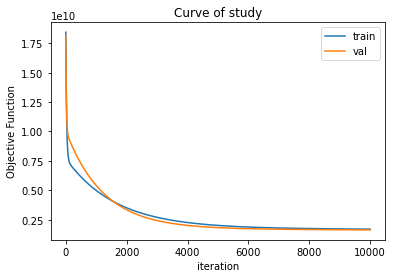

In [ ]:
L = lr.fit(X_train, y_train, X_test, y_test)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
y_test.shape

(365, 1)

In [ ]:
# 【問題4】平均二乗誤差
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y_pred - y)**2) / y_pred.shape[0]
    return mse

In [ ]:
mse = MSE(pred, y_test)

In [ ]:
mse

3341041180.515769